In [1]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/


In [2]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
...,...,...,...,...,...,...,...
9233,2022-10-28,226.240005,236.600006,226.050003,235.869995,235.869995,40647700
9234,2022-10-31,233.759995,234.919998,231.149994,232.130005,232.130005,28357300
9235,2022-11-01,234.600006,235.740005,227.330002,228.169998,228.169998,30592300
9236,2022-11-02,229.460007,231.300003,220.039993,220.100006,220.100006,38407000


In [3]:
df = df[['Date', 'Open']]

df

,Date,Open
0,1986-03-13,0.088542
1,1986-03-14,0.097222
2,1986-03-17,0.100694
3,1986-03-18,0.102431
4,1986-03-19,0.099826
...,...,...
9233,2022-10-28,226.240005
9234,2022-10-31,233.759995
9235,2022-11-01,234.600006
9236,2022-11-02,229.460007


In [4]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9233    2022-10-28
9234    2022-10-31
9235    2022-11-01
9236    2022-11-02
9237    2022-11-03
Name: Date, Length: 9238, dtype: object

In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [6]:
df

,Date,Open
0,1986-03-13,0.088542
1,1986-03-14,0.097222
2,1986-03-17,0.100694
3,1986-03-18,0.102431
4,1986-03-19,0.099826
...,...,...
9233,2022-10-28,226.240005
9234,2022-10-31,233.759995
9235,2022-11-01,234.600006
9236,2022-11-02,229.460007


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9233   2022-10-28
9234   2022-10-31
9235   2022-11-01
9236   2022-11-02
9237   2022-11-03
Name: Date, Length: 9238, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Open
Date,
1986-03-13,0.088542
1986-03-14,0.097222
1986-03-17,0.100694
1986-03-18,0.102431
1986-03-19,0.099826
...,...
2022-10-28,226.240005
2022-10-31,233.759995
2022-11-01,234.600006


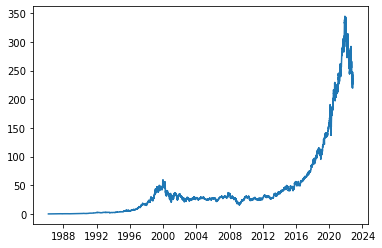

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Open'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Open'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,230.270004,237.490005,237.850006,235.300003
1,2021-03-26,237.490005,237.850006,235.300003,231.550003
2,2021-03-29,237.850006,235.300003,231.550003,236.589996
3,2021-03-30,235.300003,231.550003,236.589996,233.529999
4,2021-03-31,231.550003,236.589996,233.529999,232.910004
...,...,...,...,...,...
247,2022-03-17,280.339996,280.350006,289.109985,293.290009
248,2022-03-18,280.350006,289.109985,293.290009,295.369995
249,2022-03-21,289.109985,293.290009,295.369995,298.890015
250,2022-03-22,293.290009,295.369995,298.890015,299.799988


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

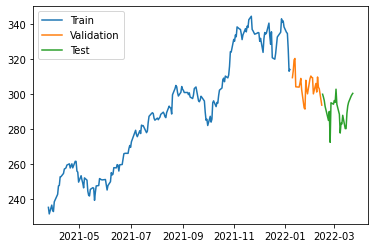

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
X_train.shape

(201, 3, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)

Epoch 1/500
7/7 [==============================] - 3s 104ms/step - loss: 84424.8125 - mean_absolute_error: 288.7957 - val_loss: 93001.9531 - val_mean_absolute_error: 304.8821
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 84047.9141 - mean_absolute_error: 288.1409 - val_loss: 92649.3984 - val_mean_absolute_error: 304.3033
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 83697.1875 - mean_absolute_error: 287.5296 - val_loss: 92193.1797 - val_mean_absolute_error: 303.5528
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 83180.6719 - mean_absolute_error: 286.6275 - val_loss: 91548.0469 - val_mean_absolute_error: 302.4883
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 82573.6172 - mean_absolute_error: 285.5728 - val_loss: 90887.2109 - val_mean_absolute_error: 301.3940
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 81925.7422 - mean_absolute_error: 284.4354 - val_loss: 90

In [15]:
train_predictions = model.predict(X_train).flatten()
print(train_predictions.shape)
print(y_train.shape)

7/7 [==============================] - 0s 3ms/step
(201,)
(201,)


In [16]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
errors = mean_absolute_error(y_train,train_predictions)
print("MEAN ABSOLUTE ERROR: ",errors)
print()
print("MEAN SQUARED ERROR",mean_squared_error(y_train,train_predictions))
print()
print("ROOT MEAN SQUARED ERROR",np.sqrt(mean_squared_error(y_train,train_predictions)))
print()
print("ROOT MEAN SQUARED ERROR log",np.log(np.sqrt(mean_squared_error(y_train,train_predictions))))
print()
print("R SQUARED SCORE IS " , r2_score(y_train,train_predictions))

MEAN ABSOLUTE ERROR:  3.1491292

MEAN SQUARED ERROR 16.622969

ROOT MEAN SQUARED ERROR 4.0771275

ROOT MEAN SQUARED ERROR log 1.4053926

R SQUARED SCORE IS  0.9837511271431506


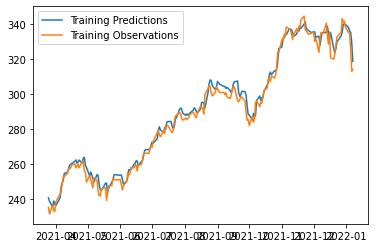

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 27ms/step


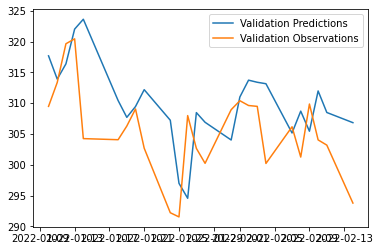

In [18]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

In [19]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
errors = mean_absolute_error(y_val,val_predictions)
print("MEAN ABSOLUTE ERROR: ",errors)
print()
print("MEAN SQUARED ERROR",mean_squared_error(y_val,val_predictions))
print()
print("ROOT MEAN SQUARED ERROR",np.sqrt(mean_squared_error(y_val,val_predictions)))
print()
print("ROOT MEAN SQUARED ERROR log",np.log(np.sqrt(mean_squared_error(y_val,val_predictions))))
print()
print("R SQUARED SCORE IS " , r2_score(y_val,val_predictions))

MEAN ABSOLUTE ERROR:  6.5146985

MEAN SQUARED ERROR 66.7581

ROOT MEAN SQUARED ERROR 8.170563

ROOT MEAN SQUARED ERROR log 2.1005378

R SQUARED SCORE IS  -0.36652860484014815


1/1 [==============================] - 0s 25ms/step


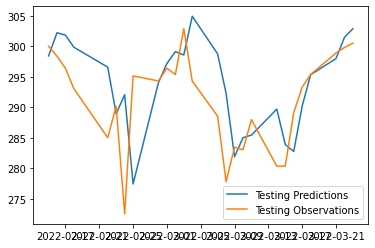

In [20]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

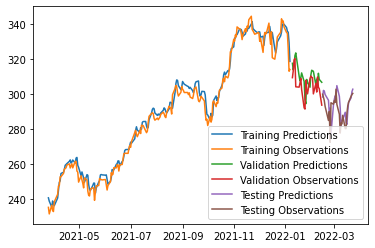

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [22]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 39ms/step


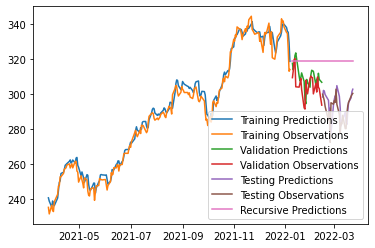

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

### **Accuracy Metrics**

In [24]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
errors = mean_absolute_error(y_val,val_predictions)
print("MEAN ABSOLUTE ERROR: ",errors)
print()
print("MEAN SQUARED ERROR",mean_squared_error(y_val,val_predictions))
print()
print("ROOT MEAN SQUARED ERROR",np.sqrt(mean_squared_error(y_val,val_predictions)))
print()
print("ROOT MEAN SQUARED ERROR log",np.log(np.sqrt(mean_squared_error(y_val,val_predictions))))
print()
print("R SQUARED SCORE IS " , r2_score(y_val,val_predictions))

MEAN ABSOLUTE ERROR:  6.5146985

MEAN SQUARED ERROR 66.7581

ROOT MEAN SQUARED ERROR 8.170563

ROOT MEAN SQUARED ERROR log 2.1005378

R SQUARED SCORE IS  -0.36652860484014815
